In [1]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

def load_surf_swarm(fdir,step):
    fname = fdir+"interface-"+str(step)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]
    ycoord = fdata[:,1]
    return xcoord,ycoord

def load_depth(fdir,maxstep,dstep):
    depth_l = []
    depth_r = []
    for step in range(0,maxstep+1,dstep):
        xcoord,ycoord = load_surf_swarm(fdir,step)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

In [5]:
dt0,maxsteps0,dstep0,= 100,54,1
times0 = np.arange(0,dt0*maxsteps0+dt0*dstep0/2,dt0*dstep0)

fdir0 = "1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka/"
fdir1 = "1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka_NUM/"
depth0_l,depth0_r = load_depth(fdir0,maxsteps0,dstep0)
depth1_l,depth1_r = load_depth(fdir1,maxsteps0,dstep0)

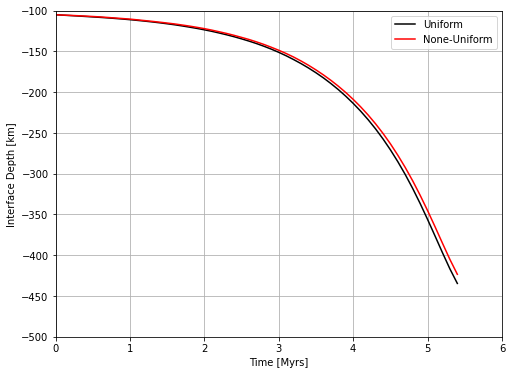

In [9]:
# Fig 3 in Kaus et al., 2010

fname = "Depth of the interface at x=−250km versus time for the free surface simulations"
fig, ax1 = plt.subplots(nrows=1, figsize=(8,6))
ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') 
ax1.plot(times0/1000,depth0_l,'-k',label="Uniform")
ax1.plot(times0/1000,depth1_l,'-r',label="None-Uniform")
ax1.set_ylim([-500,-100])
ax1.set_xlim([0,6])
ax1.grid()
ax1.legend()
#ax1.legend(loc = 'lower right',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')

|Note |Uniform| None-Uniform|
| :---: | :---: | :---: |
| Model Setup|![alt](1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka/Fig_Kaus2010RTI_0.png)|![alt](1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka_NUM/Fig_Kaus2010RTI_0.png)|
| Model Result|![alt](1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka/Fig_Kaus2010RTI_1.png)|![alt](1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt2.5ka_NUM/Fig_Kaus2010RTI_1.png)|